In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
import warnings
warnings.filterwarnings("ignore")

The dataset is available in Kaggle at link: https://www.kaggle.com/code/bhaktapri/network-intrusion-detection/input

## Data preprocessing

In [4]:
# Load the dataset
data = pd.read_csv('Train_data.csv')
data_test = pd.read_csv('Test_data.csv')

new_file=data_test

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
# prompt: I want to rename the last column in data from class to Class

data.rename(columns={'class': 'Class'}, inplace=True)


In [6]:
data.Class.value_counts()

,count
Class,
normal,13449
anomaly,11743


In [7]:
data.shape

(25192, 42)

In [8]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
# Step 2: Data Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify object columns
object_columns = data.select_dtypes(include=['object']).columns
object_columns_test = data_test.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply label encoding to each object column
for col in object_columns_test:
    data_test[col] = label_encoder.fit_transform(data_test[col])

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


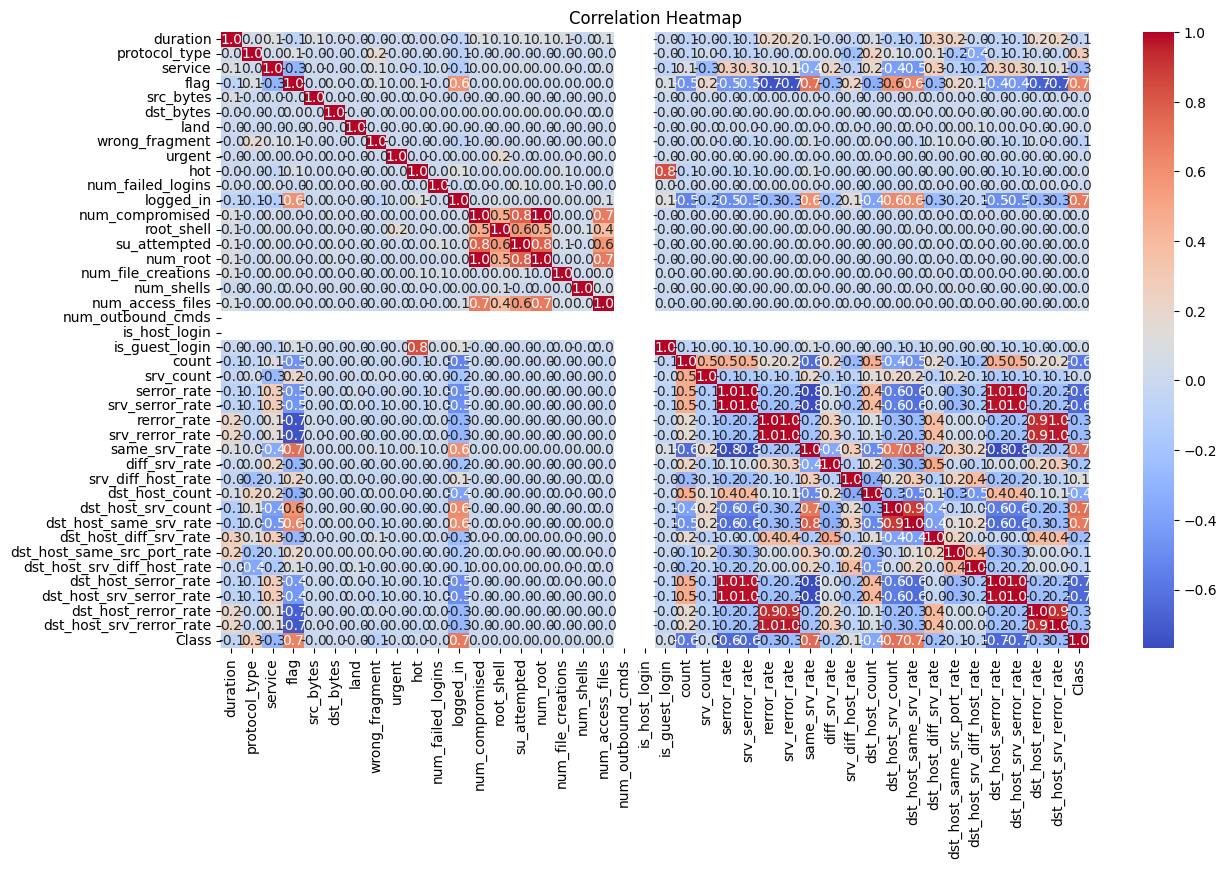

In [11]:
# Step 3 EDA
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

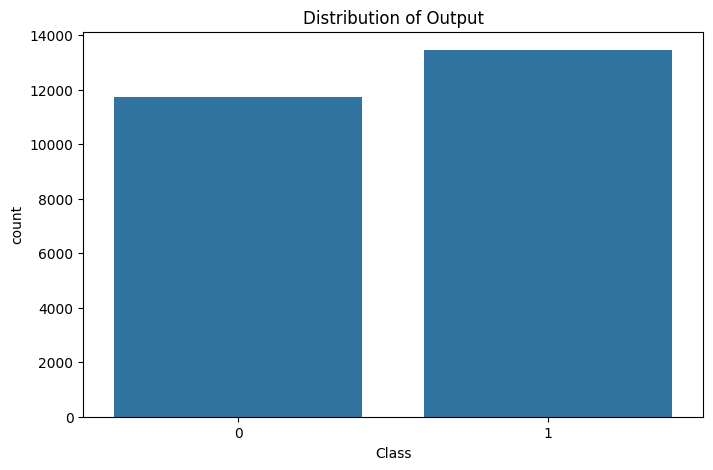

In [12]:
# Visualize the distribution of the target variable 'Grade'
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Output')
plt.show()

In [13]:
# Step 4 Extarct input and output
X=data.iloc[:,:-1]  # all columns without the last one
y=data.iloc[:,-1]   # last column only

In [14]:
# Step 5 Data scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()    #  convert to (-3 to +3)

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)
X_scaled_test=scaler.fit_transform(data_test)


In [15]:
print(X_scaled[:1])

[[-0.11355066 -0.12606067 -0.64538418  0.75302096 -0.00988885 -0.03930979
  -0.00891048 -0.09122318 -0.00630053 -0.09193335 -0.02622029 -0.80762582
  -0.02187261 -0.03937653 -0.02766547 -0.02172416 -0.02780802 -0.0189046
  -0.04391678  0.          0.         -0.09598961 -0.7202436  -0.35462794
  -0.64014201 -0.63397817 -0.3721856  -0.37309835  0.77210866 -0.34928194
  -0.37388608 -0.32863359 -0.81398452 -0.7791569  -0.2806733   0.07311974
  -0.28799346 -0.64180407 -0.62736475 -0.22166806 -0.37428075]]


In [16]:
print(X_scaled_test[:1])

[[-0.15553409 -0.17630335  0.93396356 -1.82995412 -0.02198811 -0.09689597
  -0.01762386 -0.05910394 -0.01945925 -0.11352117 -0.14399895 -0.89037263
  -0.01649356 -0.04945341 -0.01263777 -0.01425923 -0.01291094 -0.02402047
  -0.05231803  0.         -0.02209464 -0.17107132  1.16676411 -0.23719119
  -0.348468   -0.34738998  1.83014081  1.8376039  -1.6978593  -0.13149216
  -0.38696256  0.6500932  -1.1696975  -1.30536996 -0.13836964 -0.43185619
  -0.22998041 -0.35811756 -0.3527496   1.97979091  1.9291162 ]]


In [17]:
# Step 6 Feature selection

from sklearn.feature_selection import SelectKBest, f_regression

# Initialize SelectKBest with the scoring function
selector = SelectKBest(score_func=f_regression, k=25)

# Fit and transform your data
X = selector.fit_transform(X_scaled, y)
data_test=selector.transform(X_scaled_test)

In [18]:
# prompt: need to split the X_train to train and test 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(X_train.shape)
print(X_test.shape)

(20153, 25)
(5039, 25)


## Modeling

# Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9962    0.9928    0.9945      2365
           1     0.9937    0.9966    0.9951      2674

    accuracy                         0.9948      5039
   macro avg     0.9949    0.9947    0.9948      5039
weighted avg     0.9948    0.9948    0.9948      5039



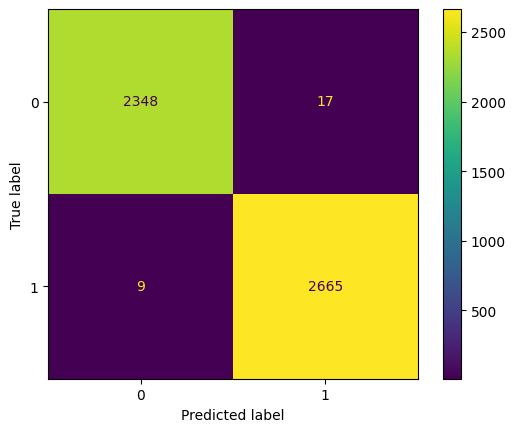

In [21]:
# Classification report
class_report = classification_report(y_test, y_pred,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0     0.9609    0.9455    0.9531      2365
           1     0.9524    0.9660    0.9592      2674

    accuracy                         0.9563      5039
   macro avg     0.9567    0.9557    0.9561      5039
weighted avg     0.9564    0.9563    0.9563      5039



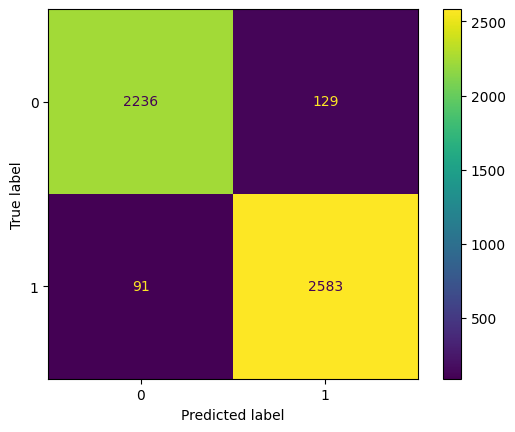

In [23]:
# Classification report
class_report = classification_report(y_test, y_pred,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

In [24]:
# prompt: predict the X_test using the best model and print first ten outputs

y_pred_test = rf_classifier.predict(data_test)
print(y_pred_test[:10])


[0 0 1 0 0 1 1 1 1 1]


In [25]:
# prompt: save the ouput of y_pred_test in new column as output in the Test_data.csv file

new_file['output']=y_pred_test
new_file.to_csv('Test_data_output.csv', index=False)
